# Text Classifier Using Multinomial Naive Bayes Algorithm

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified. Here we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories. The dataset consists of 14MB of text data on 20 distinct topics of news articles.

In [1]:
#load the required libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups

#print target names of 20 distinct categories of news articles
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [2]:
#create train and test variables from the dataset
categories = data.target_names
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Here is a representative entry from the data:

In [3]:
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. For this we will use the TF–IDF vectorizer, and create a pipeline that attaches it to a multinomial naive Bayes classifier.
With this pipeline, we can apply the model to the training data, and predict labels for the test data. The Laplace correction parameter alpha is chosen to be 0.1. This gave very high accuracy scores as compared to when the default value of alpha=1 was chosen. Accuracy when aplha=1 was 73% whereas when alpha=0.1, accuracy is 84%.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB(alpha=0.1))
model.fit(train.data, train.target)
labels = model.predict(test.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator. For example, here is the confusion matrix between the true and predicted labels for the test data.

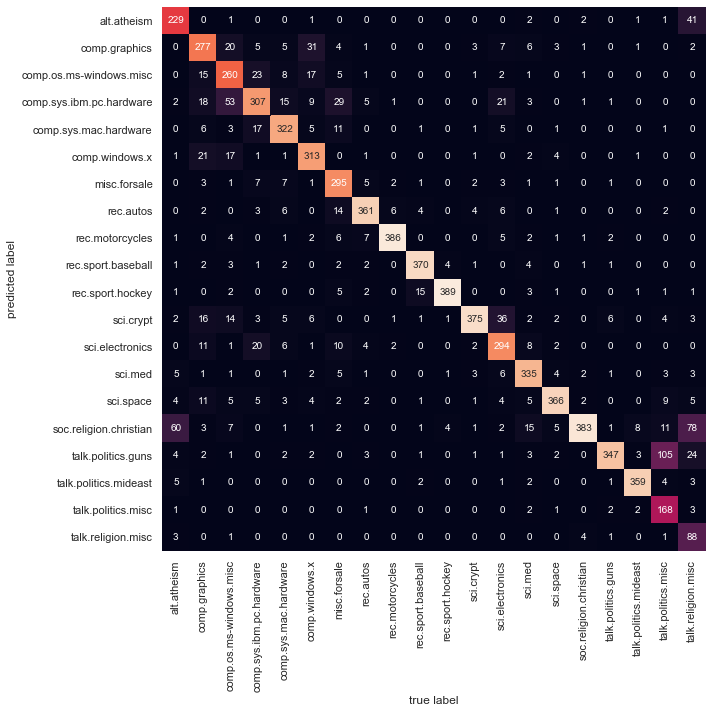

In [5]:
from sklearn.metrics import confusion_matrix

#create confusion matrix between predicted and true labels
mat = confusion_matrix(test.target, labels)

#Plot heatmap to show confusion matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names, ax=ax)
plt.xlabel('true label')
plt.ylabel('predicted label');

Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity along with every other out of place coloured square in the confusion matrix. To get further insights into the model, we can compute all the metrics such as precision, recall and accuracy score using sklearn.metrics. As we will see from the classification report that the model accuracy is actually pretty amazing considering it is only a simple naive Bayes model. Even a very naive algorithm, when used carefully and trained on a large set
of high-dimensional data, can be surprisingly effective.

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#print(confusion_matrix(test.target, labels))
print(classification_report(test.target, labels, target_names=data.target_names))
print('\nModel Accuracy is:')
print(accuracy_score(test.target, labels))

                          precision    recall  f1-score   support

             alt.atheism       0.82      0.72      0.77       319
           comp.graphics       0.76      0.71      0.73       389
 comp.os.ms-windows.misc       0.78      0.66      0.71       394
comp.sys.ibm.pc.hardware       0.66      0.78      0.72       392
   comp.sys.mac.hardware       0.86      0.84      0.85       385
          comp.windows.x       0.86      0.79      0.83       395
            misc.forsale       0.89      0.76      0.82       390
               rec.autos       0.88      0.91      0.90       396
         rec.motorcycles       0.92      0.97      0.95       398
      rec.sport.baseball       0.94      0.93      0.94       397
        rec.sport.hockey       0.92      0.97      0.95       399
               sci.crypt       0.79      0.95      0.86       396
         sci.electronics       0.81      0.75      0.78       393
                 sci.med       0.90      0.85      0.87       396
         